In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from bs4 import BeautifulSoup

In [7]:
def scrape_wikipedia(county, state):
    """
    Determines the population size of a county from its Wikipedia entry.
    Only works for counties in California.
    
    This is currently a bit hacky.
    
    Inputs:
        county: string. case-sensitive.
        state: string. state in which county is. case-sensitive.
        
    Outputs:
        pop: int.
    """
    
    form_county = county.replace(" ", "_")
    query = f'''https://en.wikipedia.org/wiki/{form_county}''' + f'_County,_{state}'
    urlpath = urlopen(query)
    soup = BeautifulSoup(urlpath, "lxml")

    right_table=soup.find('table', class_='infobox geography vcard')
    right_table.find_all('td')
    pop = eval([t.text.replace(',','').split("[", 1)[0] \
                for t in right_table.find_all('td') \
                if t.text.replace(',','').split("[", 1)[0] \
                .isnumeric()][0])
    return pop

In [26]:
def county_last_14_new(county, state='California', fractional=False):
    '''
    Plots the new cases indicator for new COVID-19 cases.
    Only works for counties in California.
    
    Inputs:
        county: string. case-sensitive.
        state: string. state in which county is. defaults to California.
        fractional: bool. Determines whether y-axis is in fraction of population or true case numbers.
    
    '''
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
    response = urlopen(url)
    cr = pd.read_csv(response)
    date_cols = [c for c in cr.columns if '/' in c]
    dates = cr[date_cols]
    new_cases = dates.diff(axis=1)
    new_cases['County'] = cr['Admin2']
    new_cases['State'] = cr['Province_State']
    corr_county = new_cases['County']==county
    corr_state = new_cases['State']==state
    county_new = new_cases[corr_county & corr_state].values[0][1:-3]
    last_14 = [np.sum(county_new[i-14:i+ 1]) for i in range(14, len(county_new))]
    
    tick_spacing=15

    pop_size = scrape_wikipedia(county, state)
    thresh=1/10000

    fig, ax = plt.subplots(1,1, figsize=(11,11))
    ax.set_title(f'New confirmed COVID-19 cases in {county} County', fontsize=20)
    
    if fractional:
        ax.plot(date_cols[15:-1], last_14/pop_size, color='gray')
        rect = patches.Rectangle((-10,thresh),180,3000, linewidth=1,edgecolor='r',
                             facecolor='lightcoral', alpha=.5,
                            label="""'Strict' CA new-case indicator""")
        ax.set_ylabel('New cases (fraction of county population)', fontsize=20);
        ax.set_ylim(0, 1.2*max(thresh, max(last_14/pop_size)))


    else:
        ax.plot(date_cols[15:-1], last_14, color='gray')
        rect = patches.Rectangle((-10,thresh * pop_size),180,3000, linewidth=1,edgecolor='r',
                             facecolor='lightcoral', alpha=.5,
                            label="""'Strict' CA new-case indicator""")
        ax.set_ylabel('New cases within 14-day period', fontsize=20);
        ax.set_ylim(0, 1.2*max(thresh*pop_size, max(last_14)))


    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xlabel('Date', fontsize=20)
    ax.axvline(x='3/19/20', color='blue', 
               label="""CA stay-at-home order goes into effect""",
              linestyle='--')
    ax.add_patch(rect)

    plt.legend(fontsize=20,)
    print(pop_size)

1781642


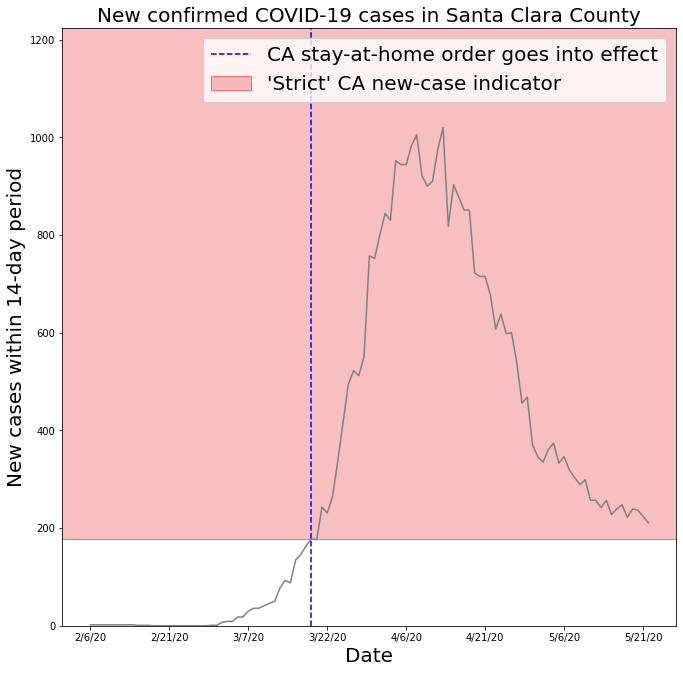

In [27]:
county_last_14_new('Santa Clara')

In [33]:
def county_new_trend(county, state='California', fractional=False):
    '''
    Plots the new cases indicator for new COVID-19 cases.
    Only works for counties in California.
    
    Inputs:
        county: string. case-sensitive.
        state: string. state in which county is. defaults to California.
        fractional: bool. Determines whether y-axis is in fraction of population or true case numbers.
    
    '''
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
    response = urlopen(url)
    cr = pd.read_csv(response)
    date_cols = [c for c in cr.columns if '/' in c]
    dates = cr[date_cols]
    new_cases = dates.diff(axis=1)
    new_cases['County'] = cr['Admin2']
    new_cases['State'] = cr['Province_State']
    corr_county = new_cases['County']==county
    corr_state = new_cases['State']==state
    county_new = new_cases[corr_county & corr_state].values[0][1:-3]
    
    tick_spacing=15

    pop_size = scrape_wikipedia(county, state)
    thresh=1/10000

    fig, ax = plt.subplots(1,1, figsize=(11,11))
    ax.set_title(f'New confirmed COVID-19 cases in {county} County', fontsize=20)
    
    if fractional:
        ax.plot(date_cols[-15:-1], county_new[-14:]/pop_size, color='gray')
        ax.set_ylabel('New cases (fraction of county population)', fontsize=20);
        ax.set_ylim(0, 1.2*max(thresh, max(county_new[-14:]/pop_size)))


    else:
        ax.plot(date_cols[-15:-1], county_new[-14:], color='gray')
        ax.set_ylabel('New cases within 14-day period', fontsize=20);
        ax.set_ylim(0, 1.2*max(thresh*pop_size, max(county_new[-14:])))


    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_xlabel('Date', fontsize=20)
    ax.axvline(x='3/19/20', color='blue', 
               label="""CA stay-at-home order goes into effect""",
              linestyle='--')

    plt.legend(fontsize=20,)
    print(pop_size)

In [ ]:
county_new_trend('Santa Clara')